## Predicting the House price of the boston datasett

In [1]:
# importing neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import pickle

In [2]:
# loading the boston dataset
from sklearn.datasets import load_boston

## Understanding the data

In [3]:
boston = load_boston()

D:\anaconda\envs\my_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
# dataset description
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# having a look at the input features
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [7]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
# checkingout the target values
print(boston.target)
print("There are {} target variables".format(len(boston.target)))

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

## Dataset Preparation

In [9]:
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
# adding the target variable to the dataset
dataset['PRICE'] = boston.target
dataset.head() #checking changes made

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
# checking dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [12]:
# checking presence of missing values
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

<p style=text-align:"justify"> There appears to be no missing values in the dataset with accurate data types</p>

In [13]:
#summary of dataset
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## EDA
<p> All the variables appear to have a float data type and the problem being addressed in this case appears to be a regression problem hence determining the correlation between the variables would be a great option </p>

In [14]:
# finding the correlation between the datasets
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<p style=text-align:"justify"> A major thin to consider with regression problems is the issue of muliticollinearity. The correlation of the various variables does not show any variables which are so much related to each other. the highest related variables appear to have a correlation of about <b>78%</b> hence the issue of multicollinearity would not be worried so much about.</p>

## Visualizing relationships

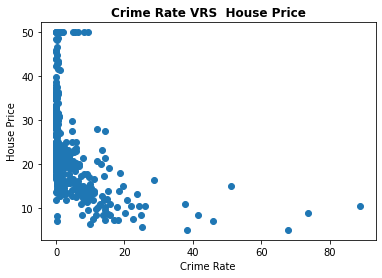

In [15]:
# viewing crime rate and scatter plot relationship visual
plt.scatter(dataset.CRIM, dataset.PRICE)
plt.xlabel('Crime Rate')
plt.ylabel('House Price')
plt.title('Crime Rate VRS  House Price', fontweight='bold');

<p> The correlation value earlier indicated the two variables were negatively correlated which conforms with what the visual displays that as the crime rate increases, the price of the house decreases</p>

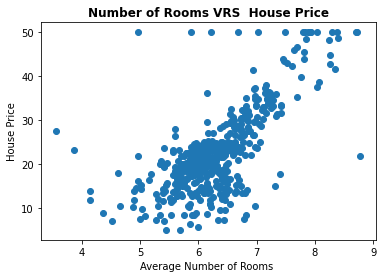

In [16]:
# viewing crime rate and scatter plot relationship visual
plt.scatter(dataset.RM, dataset.PRICE)
plt.xlabel('Average Number of Rooms ')
plt.ylabel('House Price')
plt.title('Number of Rooms VRS  House Price', fontweight='bold');

<p> The correlation between the two variables seem strong in the positive direction which suggest an increase in the average number of rooms usually increases the price of the house </p>

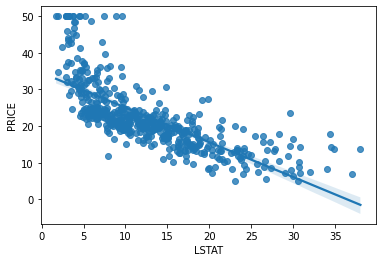

In [17]:
# lower status of population with price
sns.regplot(x=dataset['LSTAT'], y=dataset['PRICE'], data=dataset);

<p> As the percentage of persons with lower status increases, the price of the house seems to also fall low </p>

## Separating Dependant from independent variables

In [18]:
X = dataset.iloc[:, :-1] #independent variables
y = dataset.iloc[:,-1] #dependent variables

In [19]:
# verifying the independent variables
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [20]:
# verifying the dependent variables
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

## Splitting data into Training and Testing Sets

In [21]:
# importing relevant models for training dataset
from sklearn.model_selection import train_test_split

In [22]:
# splitting dataset into training and testing purpose
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Standardizing the dataset

In [23]:
# Scling the dataset 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
# scaling the X_train and X_test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# pickling the scaler for future use
pickle.dump(scaler, open('scaling.pkl', 'wb'))

## Model Training

In [25]:
# importing relevant models for training 
from sklearn.linear_model import LinearRegression

In [26]:
# setting up the model
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [27]:
print(regression.coef_) #printing coefficient for each variable
print('')
print(regression.intercept_) #printing the intercept of the model

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]

23.01581920903955


<p> For each unit increase in the crime rate, the price appears to decrease by <b>1.10834602</b>, the proportion of residual land loaned increases by <b>0.80843998</b>, the proportion of black people by town decreases by <b>-2.05232232</b> </p>

## Prediction

In [28]:
# runing model on test data
reg_pred = regression.predict(X_test)

In [29]:
# checking predicted values
reg_pred[:10]

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345])

## Assumptions

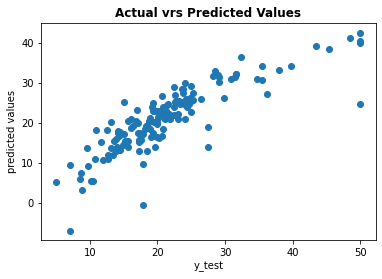

In [30]:
# checking relationship between predicted and actual values by scatter plot
plt.scatter(y_test, reg_pred)
plt.xlabel('y_test')
plt.ylabel('predicted values')
plt.title('Actual vrs Predicted Values', fontweight='bold');

<p> The actual and predicted values seem to have a very strong correlation giving an indication that the model did perform well under the circumstance </p>

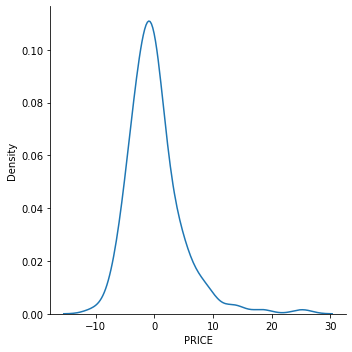

In [31]:
# calculating and ploting residuals with kde
residuals = y_test - reg_pred #cal difference between actual and predicted values

# plotting the residuals using kde
sns.displot(residuals, kind='kde');

<p> Our assumption for this plot is to gain a normal distribution </p>
<p> The errors between these values seem to follow a normal distribution with a mojority of them lying between <strong> -10 to 10 </strong>. A few of the errors also appears to fall above the <b>10th</b> value recording a maximun of about <b>30</b> which under most cases could be outliers within the dataset</p>

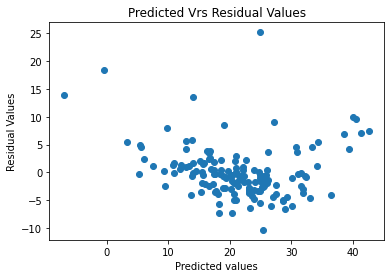

In [32]:
# plotting predictions with residuals
plt.scatter(reg_pred, residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residual Values')
plt.title('Predicted Vrs Residual Values');

<p> The expected outcome is a uniform distribution of the variables which could be seem from out plot above thus again giving us an indication that the model somehow did perform well. </p>

## Using Performance metrics to evaluate model

In [35]:
# importing performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
# print out performance metrics for the model outcome
print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, reg_pred)))
print('Mean Squared Error : {}'. format(mean_squared_error(y_test, reg_pred)))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))
score = r2_score(y_test, reg_pred)
print('R_squared value : {}'.format(score))
# print('Adjusted R_squared Value : {}'.format(1-(((1-score)*(len(y_test)-1)) / (len(y_test)-X_test.shape[1]-1))

Mean Absolute Error : 3.162709871457406
Mean Squared Error : 21.51744423117721
4.6386899261728205
R_squared value : 0.7112260057484932


## New Data Prediction
<p> We consider the case when a new dataset is introduced. In this part we explain briefly how the prediction is supposed to be done. </p>

In [41]:
# checking the shape of the new data to be fed into the model
boston.data[0].shape

(13,)

<p> The dataset appears to have a one dimensional shape hence would have to to be coverted into a 2D array of which is how our model could accept it </p>

In [43]:
# converting input data into a 2D array
boston.data[0].reshape(1, -1).shape

(1, 13)

<p> We now have the desired shape to be fed into our model. We would thus want to transform the the data using the scaler generated initially </p>

In [44]:
# transforming data
scaler.transform(boston.data[0].reshape(1, -1))

D:\anaconda\envs\my_env\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[-0.41709233,  0.29216419, -1.27338003, -0.28154625, -0.16513629,
         0.34715902, -0.13030059,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483,  0.42854113, -1.04769976]])

<p> We would now predict the price of the house using this features </p>

In [45]:
regression.predict(scaler.transform(boston.data[0].reshape(1, -1)))

D:\anaconda\envs\my_env\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([30.08649576])

## Pickling model file for deployment

In [47]:
# importing the pickle module
import pickle

In [50]:
# pickling the model to used for deployment
pickle.dump(regression, open('regmodel.pkl', 'wb'))

In [51]:
# loading the pickle generated
pickle_module = pickle.load(open('regmodel.pkl', 'rb'))

In [53]:
# testing pickle model on boston data
pickle_module.predict(scaler.transform(boston.data[0].reshape(1, -1)))

D:\anaconda\envs\my_env\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([30.08649576])